<a href="https://colab.research.google.com/github/VeraMendes/DS-Unit-2-Regression-Classification/blob/master/module2/Vera_Mendes_Assignment_regression_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [1]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module2')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 19.30 MiB | 14.47 MiB/s, done.
Resolving deltas: 100% (71/71), done.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 9.0MB/s 
     |████████████████████████████████| 112kB 27.9MB/s 
     |████████████████████████████████| 133kB 52.3MB/s 
     |████████████████████████████████| 57.7MB 1.3MB/s 
     |████████████████████████████████| 235kB 50.6MB/s 
     |████████████████████████████████| 614kB 45.8MB/s 
     |████████████████████████████████| 235kB 56.0MB/s 
     |████████████████████████████████| 307kB 57.2MB/s 
     |████████████████████████████████| 51kB 25.5MB/s 
     |████████████████████████████████| 215kB 48.6MB/s 
     |█████████

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv('../data/apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [0]:
# import libraries
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000
mean,1.201794,1.537149,40.750760,-73.972760,3579.585247,0.524838,0.478276,0.478276,0.447631,0.424852,0.415081,0.367085,0.052769,0.268452,0.185653,0.175902,0.132761,0.138394,0.102833,0.087203,0.060471,0.055206,0.051908,0.046193,0.043305,0.042711,0.039331,0.027224,0.026241
std,0.470711,1.106087,0.038954,0.028883,1762.430772,0.499388,0.499533,0.499533,0.497255,0.494326,0.492741,0.482015,0.223573,0.443158,0.388830,0.380741,0.339320,0.345317,0.303744,0.282136,0.238359,0.228385,0.221844,0.209905,0.203544,0.202206,0.194382,0.162738,0.159852
min,0.000000,0.000000,40.575700,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
df.describe(exclude='number')

,created,description,display_address,street_address,interest_level
count,48817,47392,48684,48807,48817
unique,48148,37853,8674,15135,3
top,2016-06-12 13:20:45,,Broadway,3333 Broadway,low
freq,3,1627,435,174,33946


In [51]:
# mean baseline
df['price'].mean()

3579.5852469426636

In [0]:
# using number of apartment rooms
df['rooms'] = df['bathrooms'] + df['bedrooms']

In [0]:
# using pets allowed
df['pets'] = df['cats_allowed'] + df['dogs_allowed']

In [0]:
# using location by lat and long
# use numbers represented

In [0]:
# using apartment description
df['description'] = df['elevator'] + df['hardwood_floors'] + df['doorman'] + df['dishwasher'] + df['no_fee'] + df['laundry_in_unit'] + df['fitness_center'] + df['roof_deck'] + df['outdoor_space'] + df['dining_room'] + df['high_speed_internet'] + df['balcony'] + df['swimming_pool'] + df['terrace'] + df['loft'] + df['garden_patio'] + df['wheelchair_access'] + df['common_outdoor_space']

In [56]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,rooms,pets
0,1.5,3,2016-06-24 07:54:24,0,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.5,0
1,1.0,2,2016-06-12 12:19:27,3,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,2
2,1.0,1,2016-04-17 03:26:41,2,W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0
3,1.0,1,2016-04-18 02:22:02,2,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0
4,1.0,4,2016-04-28 01:32:41,0,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,0


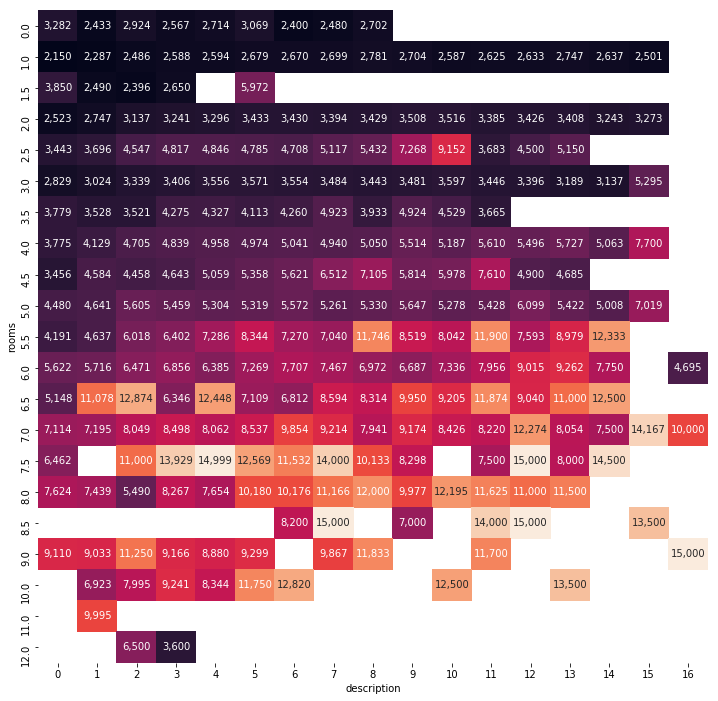

In [21]:
table = df.pivot_table('price', 'rooms', 'description')

plt.figure(figsize=(12,12))
sns.heatmap(table, annot=True, fmt=',.0f', cbar=False);

In [0]:
# higher description numbers, higher number of rooms, higher prices as per the heatmap

In [0]:
# convert created into datetime
df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)

In [0]:
# splitting data
train = df[df['created'] < '2016-06-01 00:00:00']
test = df[df['created'] >= '2016-06-01 00:00:00']

In [59]:
train.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,rooms,pets
2,1.0,1,2016-04-17 03:26:41,2,W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0
3,1.0,1,2016-04-18 02:22:02,2,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0
4,1.0,4,2016-04-28 01:32:41,0,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,0
5,2.0,4,2016-04-19 04:24:47,0,West 18th Street,40.7429,-74.0028,7995,350 West 18th Street,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0
6,1.0,2,2016-04-27 03:19:56,1,West 107th Street,40.8012,-73.9660,3600,210 West 107th Street,low,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,2


In [60]:
test.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,rooms,pets
0,1.5,3,2016-06-24 07:54:24,0,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.5,0
1,1.0,2,2016-06-12 12:19:27,3,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,2
11,1.0,1,2016-06-03 03:21:22,0,W. 173rd Street,40.8448,-73.9396,1675,644 W. 173rd Street,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0
14,1.0,1,2016-06-01 03:11:01,3,East 56th St..,40.7584,-73.9648,3050,315 East 56th St..,low,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0
24,2.0,4,2016-06-07 04:39:56,9,W 18 St.,40.7391,-73.9936,7400,30 W 18 St.,medium,1,1,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,6.0,2


In [61]:
# Our train data is about double of our test data
len(train), len(test)

(31844, 16973)

In [62]:
# my y target vector
y_train = train['price']
y_test = test['price']

# mean baseline
print('mean baseline:', train['price'].mean())

# train Error
y_pred = [train['price'].mean()] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error (rent an apartment in NYC till 1st June 2016): {mae:.2f}')

# test Error
y_pred = [train['price'].mean()] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error (rent an apartment in NYC after 1st June 2016): {mae:.2f}')

mean baseline: 3575.604007034292
Train Error (rent an apartment in NYC till 1st June 2016): 1201.88
Test Error (rent an apartment in NYC after 1st June 2016): 1197.71


In [63]:
# instantiate this class
model1 = LinearRegression()

# arranging my X features matrices
features = ['rooms', 'description']
X_train = train[features]
X_test = test[features]
print(f'Linear Regression, dependent on: {features}')

# fitting the model to my data
model1.fit(X_train, y_train)

# TRAIN MAE, RSME & R2:
train_mae = mean_absolute_error(y_train, model1.predict(X_train))
train_rmse = np.sqrt(mean_squared_error(y_train, model1.predict(X_train)))
r2_train = r2_score(y_train, model1.predict(X_train))
print('Train Mean_Absolute_error:', train_mae)
print('Train Root_Mean_Square_error:', train_rmse)
print('Train R\u00b2:', r2_train)

# applying the model to the test data
# TEST MAE, RSME & R2:
test_mae = mean_absolute_error(y_test, model1.predict(X_test))
test_rmse = np.sqrt(mean_squared_error(y_test, model1.predict(X_test)))
r2_test = r2_score(y_test, model1.predict(X_test))
print('Test Mean_Absolute_error:', test_mae)
print('Test Root_Mean_Square_error:', test_rmse)
print('Test R\u00b2:', r2_test)

print('Model 1 Coeficient:', model1.coef_)
print('Model 1 Intercept:', model1.intercept_)

Linear Regression, dependent on: ['rooms', 'description']
Train Mean_Absolute_error: 857.319591760761
Train Root_Mean_Square_error: 1294.911560811904
Train R²: 0.45997400581979064
Test Mean_Absolute_error: 869.002474841929
Test Root_Mean_Square_error: 1293.1310413777348
Test R²: 0.46197668996968067
Model 1 Coeficient: [763.52470019 112.60415589]
Model 1 Intercept: 1101.1296877313703


In [0]:
#  Model1 better than baseline.

In [65]:
# instantiate this class
model2 = LinearRegression()

# arranging my X features matrices
features = ['rooms', 'pets', 'latitude']
X_train = train[features]
X_test = test[features]
print(f'Linear Regression, dependent on: {features}')

# fitting the model to my data
model2.fit(X_train, y_train)

# TRAIN MAE, RSME & R2:
train_mae = mean_absolute_error(y_train, model2.predict(X_train))
train_rmse = np.sqrt(mean_squared_error(y_train, model2.predict(X_train)))
r2_train = r2_score(y_train, model2.predict(X_train))
print('Train Mean_Absolute_error:', train_mae)
print('Train Root_Mean_Square_error:', train_rmse)
print('Train R\u00b2:', r2_train)

# applying the model to the test data
# TEST MAE, RSME & R2:
test_mae = mean_absolute_error(y_test, model2.predict(X_test))
test_rmse = np.sqrt(mean_squared_error(y_test, model2.predict(X_test)))
r2_test = r2_score(y_test, model2.predict(X_test))
print('Test Mean_Absolute_error:', test_mae)
print('Test Root_Mean_Square_error:', test_rmse)
print('Test R\u00b2:', r2_test)

print('Model 2 Coeficient:', model2.coef_)
print('Model 2 Intercept:', model2.intercept_)

Linear Regression, dependent on: ['rooms', 'pets', 'latitude']
Train Mean_Absolute_error: 882.5123099088588
Train Root_Mean_Square_error: 1335.1763630587316
Train R²: 0.42586804519237287
Test Mean_Absolute_error: 900.211553204051
Test Root_Mean_Square_error: 1334.9995970761943
Test R²: 0.4265728028865773
Model 2 Coeficient: [  809.96721528    98.12318792 -1925.27522181]
Model 2 Intercept: 79728.5339737606


In [0]:
#  Model2 is better than baseline but worst than Model1.

In [66]:
# instantiate this class
model3 = LinearRegression()

# arranging my X features matrices
features = ['rooms', 'latitude', 'longitude']
X_train = train[features]
X_test = test[features]
print(f'Linear Regression, dependent on: {features}')

# fitting the model to my data
model3.fit(X_train, y_train)

# TRAIN MAE, RSME & R2:
train_mae = mean_absolute_error(y_train, model3.predict(X_train))
train_rmse = np.sqrt(mean_squared_error(y_train, model3.predict(X_train)))
r2_train = r2_score(y_train, model3.predict(X_train))
print('Train Mean_Absolute_error:', train_mae)
print('Train Root_Mean_Square_error:', train_rmse)
print('Train R\u00b2:', r2_train)

# applying the model to the test data
# TEST MAE, RSME & R2:
test_mae = mean_absolute_error(y_test, model3.predict(X_test))
test_rmse = np.sqrt(mean_squared_error(y_test, model3.predict(X_test)))
r2_test = r2_score(y_test, model3.predict(X_test))
print('Test Mean_Absolute_error:', test_mae)
print('Test Root_Mean_Square_error:', test_rmse)
print('Test R\u00b2:', r2_test)

print('Model 3 Coeficient:', model3.coef_)
print('Model 3 Intercept:', model3.intercept_)

Linear Regression, dependent on: ['rooms', 'latitude', 'longitude']
Train Mean_Absolute_error: 806.8015134973074
Train Root_Mean_Square_error: 1247.8860603109258
Train R²: 0.49848455142997106
Test Mean_Absolute_error: 819.9377245871775
Test Root_Mean_Square_error: 1244.4257668496004
Test R²: 0.5017423126357197
Model 3 Coeficient: [   822.57763242   2349.41267084 -17759.23648137]
Model 3 Intercept: -1408113.6951173802


In [0]:
# best fit so far is model3.

In [67]:
# instantiate this class
model4 = LinearRegression()

# arranging my X features matrices
features = ['rooms', 'latitude', 'longitude', 'description', 'pets']
X_train = train[features]
X_test = test[features]
print(f'Linear Regression, dependent on: {features}')

# fitting the model to my data
model4.fit(X_train, y_train)

# TRAIN MAE, RSME & R2:
train_mae = mean_absolute_error(y_train, model4.predict(X_train))
train_rmse = np.sqrt(mean_squared_error(y_train, model4.predict(X_train)))
r2_train = r2_score(y_train, model4.predict(X_train))
print('Train Mean_Absolute_error:', train_mae)
print('Train Root_Mean_Square_error:', train_rmse)
print('Train R\u00b2:', r2_train)

# applying the model to the test data
# TEST MAE, RSME & R2:
test_mae = mean_absolute_error(y_test, model4.predict(X_test))
test_rmse = np.sqrt(mean_squared_error(y_test, model4.predict(X_test)))
r2_test = r2_score(y_test, model4.predict(X_test))
print('Test Mean_Absolute_error:', test_mae)
print('Test Root_Mean_Square_error:', test_rmse)
print('Test R\u00b2:', r2_test)

print('Model 4 Coeficient:', model4.coef_)
print('Model 4 Intercept:', model4.intercept_)

Linear Regression, dependent on: ['rooms', 'latitude', 'longitude', 'description', 'pets']
Train Mean_Absolute_error: 787.082258355765
Train Root_Mean_Square_error: 1225.3733710166741
Train R²: 0.5164166657987642
Test Mean_Absolute_error: 796.7852390145724
Test Root_Mean_Square_error: 1220.7743623948259
Test R²: 0.5205019800555658
Model 4 Coeficient: [   789.60846929   2209.29839072 -15422.86554567     75.99693634
     62.31965919]
Model 4 Intercept: -1229805.4977154566


In [0]:
# best fit so far is model4.

In [0]:
# regression 3D plot for model1

regression